In [1]:
from __future__ import absolute_import, division, print_function

# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.contrib import lite
from keras import backend as K
from keras import layers
from keras.models import Sequential
from keras.models import Model
from keras.layers.core import Activation
from PIL import Image
import matplotlib.pyplot as plt
import pickle

# Helper libraries
import numpy as np

Using TensorFlow backend.


In [39]:
# Allows to get a one or more set of 10 images and lbl for that set 
# for each group
def mapImgLabel(Xarr, Yarr, array):
    # So that I can easily get the lbl and the image
    array = np.asarray(array).T
    array = array.tolist()
    for i in range (len(array[0]) - 9):
        Xarr.append(array[0][i:i+10])
        Yarr.append(array[1][i+9])
    #print(len(Xarr), len(Yarr))

In [108]:
with open ('features.txt', 'rb') as fp:
    array = pickle.load(fp)

bins = np.array([0,1,2,3,4,5,6,7,8])
numBins = bins.size    

img_arr = []
print(len(array),len(array[0]),len(array[0][0]))

# Going through each group to get sets of 10 images
Xarr = []
Yarr = []
for arr in array:
    mapImgLabel(Xarr,Yarr,arr)
    
newX = np.stack(Xarr, axis=0)

print(newX.shape)
print(newX[0].shape)
print(newX[0][0].shape)

# Transposing so that I can reshape it to (# of sets, 50, 50, 10)
newX = np.transpose(newX, (0, 2, 1)).reshape(newX.shape[0],50,50,10)/255.0


#print(newX[0])

print(newX.shape)
print(newX[0].shape)
print(newX[0][0].shape)
"""

# Allows duplication of sets
arr = []
multi = [11, 22, 4, 11, 62, 16, 1, 1, 2]
size = X_train.shape[0]
for i in range(size):
    num = int(y_train[i])
    arr.append(multi[num])

newX = np.repeat(X_train, arr, axis=0)
Yarr = np.repeat(y_train, arr, axis=0)
"""

X_train, X_test, y_train, y_test = train_test_split(newX,Yarr, test_size=0.33, random_state=42)




7 692 2
(2539, 10, 2500)
(10, 2500)
(2500,)
(2539, 50, 50, 10)
(50, 50, 10)
(50, 10)


In [48]:
print(X_train[0])

[[[0.49803922 0.49803922 0.73333333 ... 0.50196078 0.10588235 0.10588235]
  [0.84313725 0.84313725 0.84705882 ... 0.77647059 0.20392157 0.20392157]
  [0.85882353 0.85882353 0.85882353 ... 0.2        0.19215686 0.19215686]
  ...
  [0.20392157 0.20392157 0.81176471 ... 0.89411765 0.91372549 0.91372549]
  [0.19607843 0.19607843 0.21176471 ... 0.90588235 0.90588235 0.90588235]
  [0.19215686 0.19215686 0.2        ... 0.96470588 0.98823529 0.98823529]]

 [[0.3254902  0.3254902  0.71372549 ... 0.11764706 0.16862745 0.16862745]
  [0.81568627 0.81568627 0.81960784 ... 0.07843137 0.19607843 0.19607843]
  [0.8627451  0.8627451  0.84705882 ... 0.18823529 0.2        0.2       ]
  ...
  [0.2        0.2        0.75686275 ... 0.71764706 0.94509804 0.94509804]
  [0.19607843 0.19607843 0.20784314 ... 0.96470588 0.98823529 0.98823529]
  [0.19215686 0.19215686 0.2        ... 0.96078431 0.99607843 0.99607843]]

 [[0.22352941 0.22352941 0.73333333 ... 0.11372549 0.16078431 0.16078431]
  [0.77647059 0.776470

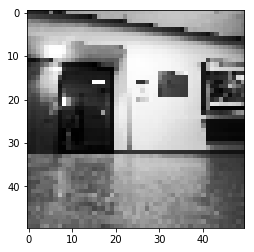

In [121]:
plt.imshow(np.squeeze(newX[130,:,:,0]), cmap='gray')

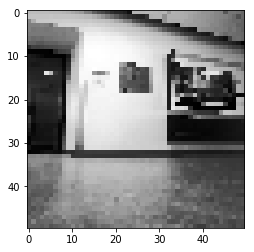

In [122]:
plt.imshow(np.squeeze(newX[130,:,:,4]), cmap='gray')

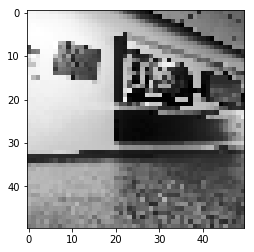

In [123]:
plt.imshow(np.squeeze(newX[130,:,:,9]), cmap='gray')

In [33]:
y_train[207]

6

In [44]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=(50,50,10), 
                 name='my_layer'))
convout1 = Activation('relu')
model.add(convout1)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
convout2 = Activation('relu')
model.add(convout2)
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(numBins, activation='softmax'))

In [45]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [46]:
epochs = 10
model.fit(X_train, y_train, epochs=epochs, batch_size=70)

Epoch 1/10


InvalidArgumentError: Tensor conv3d_5_input:0, specified in either feed_devices or fetch_devices was not found in the Graph

In [13]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print((test_loss, test_acc))


838/838 [==============================] - 2s 3ms/step
(0.46781447728949116, 0.8520286394758839)


In [14]:
X_axis = [[],[]]
Y_axis = [[],[]]
colors = ["green","red"]
labels = ["Correct","Wrong"]

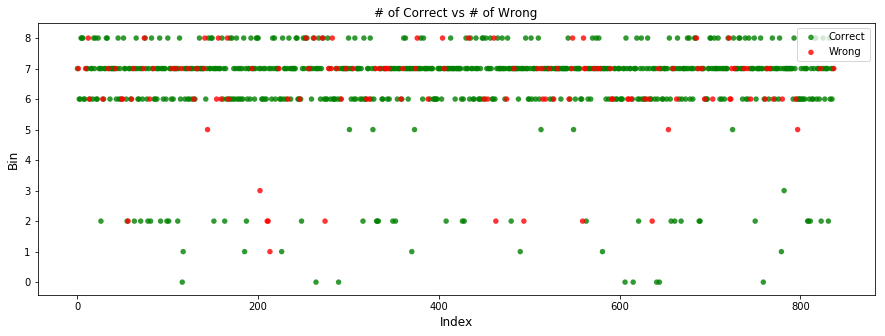

In [15]:
for k in range(len(X_test)):
    predicted = model.predict_classes(X_test[k:k+1])[0]
    actual = y_test[k]
    if predicted !=  actual:
        X_axis[1].append(k)
        Y_axis[1].append(predicted)
    else:
        X_axis[0].append(k)
        Y_axis[0].append(int(actual))

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)

for index,box,color,lbl in zip(X_axis,Y_axis,colors,labels):
    ax.scatter(index, box, alpha=0.8, c=color, edgecolors='none', s=30, label=lbl)

plt.title("# of Correct vs # of Wrong")
plt.xlabel('Index', fontsize=12)
plt.ylabel('Bin', fontsize=12)
plt.legend(loc=1)
plt.show()

In [16]:
with open("./models/model1.txt", "a") as myfile:
        myfile.write("Multi: " + str(multi) + " Epochs: " + str(epochs) + " Test Loss: " + str(test_loss) + " Test Acc: " + str(test_acc) + "\n")

In [17]:
# choose any image to want by specifying the index
img_to_visualize = X_train[0]
# Keras requires the image to be in 4D
# So we add an extra dimension to it.
img_to_visualize = np.expand_dims(img_to_visualize, axis=0)

In [18]:
def layer_to_visualize(layer):
    inputs = [K.learning_phase()] + model.inputs

    _convout1_f = K.function(inputs, [layer.output])
    def convout1_f(X):
        # The [0] is to disable the training phase flag
        return _convout1_f([0] + [X])

    convolutions = convout1_f(img_to_visualize)
    convolutions = np.squeeze(convolutions)
    convolutions = np.transpose(convolutions, (2, 0, 1))

    print ('Shape of conv:', convolutions.shape)
    
    n = convolutions.shape[0]
    n = int(np.ceil(np.sqrt(n)))
    
    # Visualization of each filter of the layer
    fig = plt.figure(figsize=(12,8))
    for i in range(len(convolutions)):
        ax = fig.add_subplot(n,n,i+1)
        ax.imshow(convolutions[i], cmap='gray')

Shape of conv: (32, 48, 48)
Shape of conv: (64, 22, 22)


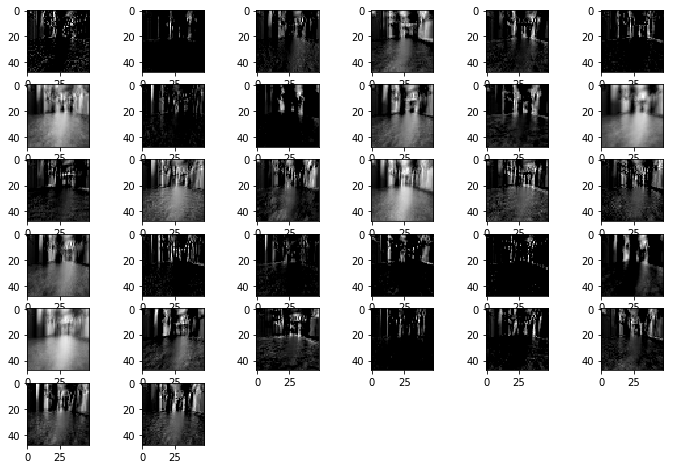

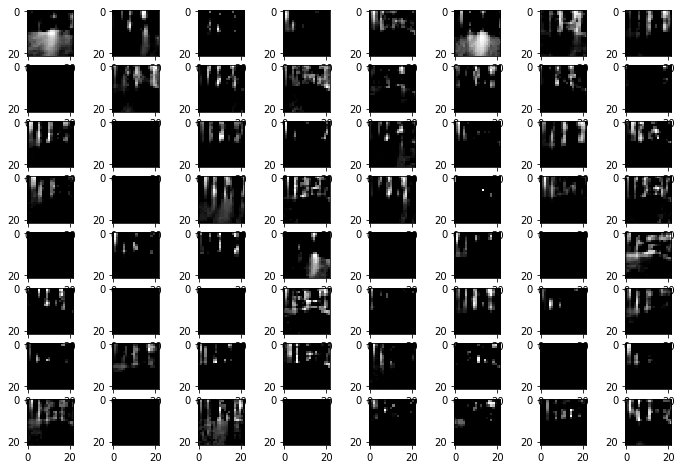

In [19]:
# Specify the layer to want to visualize

layer_to_visualize(convout1)

layer_to_visualize(convout2)


In [20]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)

keras_file = "model.h5"
model.save(keras_file)

converter = lite.TFLiteConverter.from_keras_model_file(keras_file)
tflite_model = converter.convert()
open("model.tflite", "wb").write(tflite_model)

Instructions for updating:
Use tf.compat.v1.graph_util.convert_variables_to_constants
Instructions for updating:
Use tf.compat.v1.graph_util.extract_sub_graph
INFO:tensorflow:Froze 8 variables.
INFO:tensorflow:Converted 8 variables to const ops.


4058104